In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

In [2]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.9
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [5]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [10]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [15]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

In [17]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [18]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [19]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [20]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [21]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


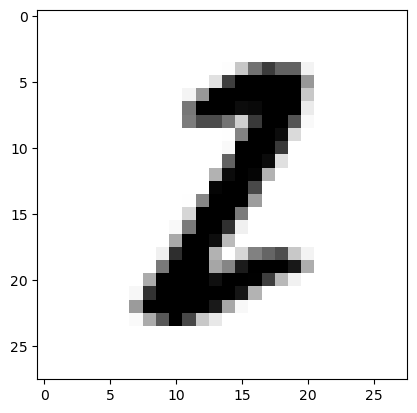

In [22]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

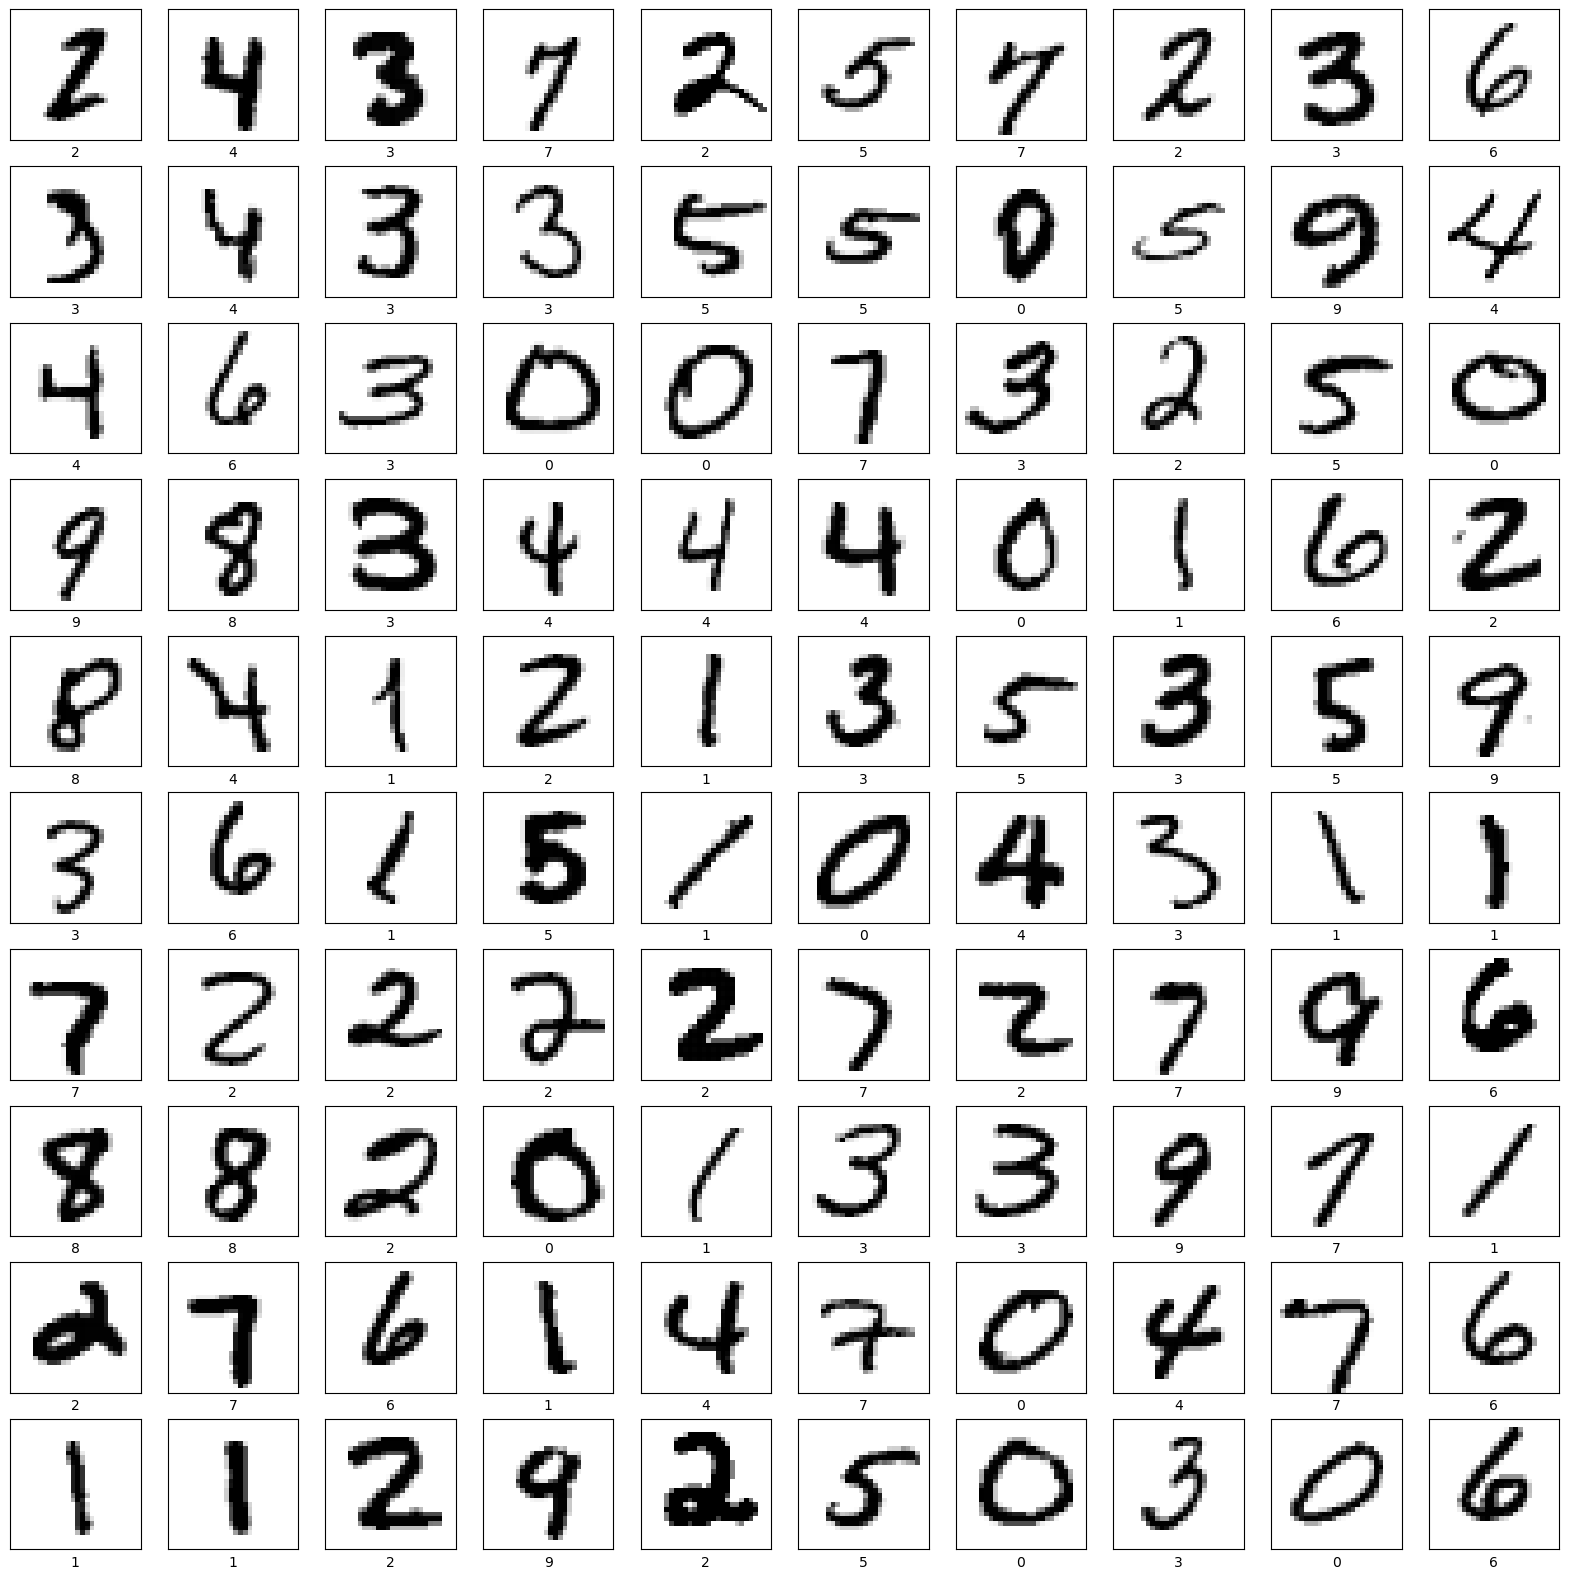

In [23]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [24]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [25]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [26]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [27]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [28]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [30]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [32]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 28s 25ms/step - loss: 0.2967 - accuracy: 0.9084 - val_loss: 0.0898 - val_accuracy: 0.9726
Epoch 2/10
1050/1050 [==============================] - 33s 32ms/step - loss: 0.0902 - accuracy: 0.9723 - val_loss: 0.0593 - val_accuracy: 0.9824
Epoch 3/10
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0680 - accuracy: 0.9789 - val_loss: 0.0632 - val_accuracy: 0.9819
Epoch 4/10
1050/1050 [==============================] - 28s 26ms/step - loss: 0.0524 - accuracy: 0.9837 - val_loss: 0.0490 - val_accuracy: 0.9852
Epoch 5/10
1050/1050 [==============================] - 18s 18ms/step - loss: 0.0441 - accuracy: 0.9859 - val_loss: 0.0423 - val_accuracy: 0.9870
Epoch 6/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0505 - val_accuracy: 0.9861
Epoch 7/10
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0330 - accuracy: 0.9900 - val_loss: 0.0414 -

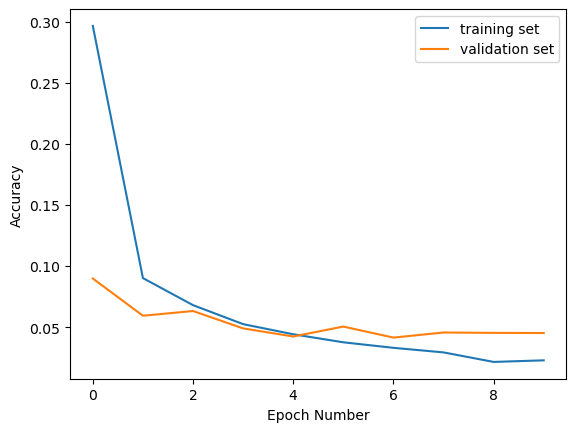

In [33]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

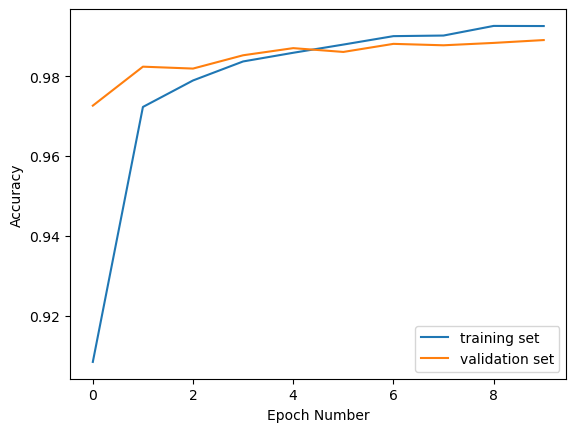

In [34]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [35]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [36]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.010122205130755901
Train accuracy:  0.996666669845581


In [37]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [38]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04515738785266876
Validation accuracy:  0.989047646522522


In [39]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [40]:
loaded_model = tf.keras.models.load_model(model_name)

In [41]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 1s 5ms/step


In [42]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [43]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,4.929569e-07,9.999964e-01,2.493632e-06,3.849189e-15,5.182945e-10,2.165987e-09,1.216571e-07,1.968310e-08,4.221034e-07,8.223822e-11
1,2.659489e-12,3.921572e-09,3.562727e-09,9.999030e-01,5.369419e-11,3.924025e-06,1.319643e-14,8.239024e-10,1.978189e-07,9.293359e-05
2,1.640224e-11,8.384829e-09,7.879527e-08,4.827591e-09,1.485719e-11,4.544213e-08,1.505745e-09,7.217817e-12,9.999999e-01,5.786946e-09
3,2.115586e-07,9.999895e-01,3.334732e-06,2.737437e-11,1.084289e-07,2.042310e-08,9.722078e-08,6.718943e-06,7.308424e-08,2.437787e-09
4,1.631954e-15,2.524374e-14,1.028435e-11,2.569643e-12,2.683034e-06,6.605386e-12,6.636580e-19,1.441678e-06,1.881568e-06,9.999939e-01
...,...,...,...,...,...,...,...,...,...,...
8395,2.897568e-14,6.177767e-12,3.941963e-12,2.506297e-18,1.000000e+00,1.337169e-13,1.070479e-10,1.376055e-13,1.373025e-16,2.276835e-11
8396,5.626077e-11,2.933643e-12,6.342862e-17,3.599509e-11,1.605457e-12,9.999877e-01,1.224905e-05,2.701656e-15,4.867994e-09,6.955156e-14
8397,1.322365e-13,1.485836e-10,1.158044e-15,1.613728e-13,2.372345e-10,4.549514e-11,1.336642e-16,1.000000e+00,1.100336e-14,1.781243e-09
8398,2.262662e-11,2.309903e-12,1.689382e-11,6.612557e-13,2.043761e-12,5.573549e-09,1.000000e+00,2.377455e-17,6.663832e-14,2.187893e-17


In [44]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


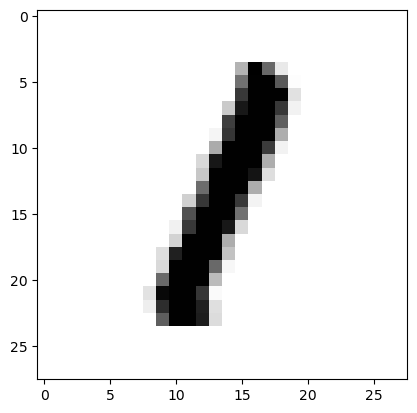

In [45]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9416\547587288.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


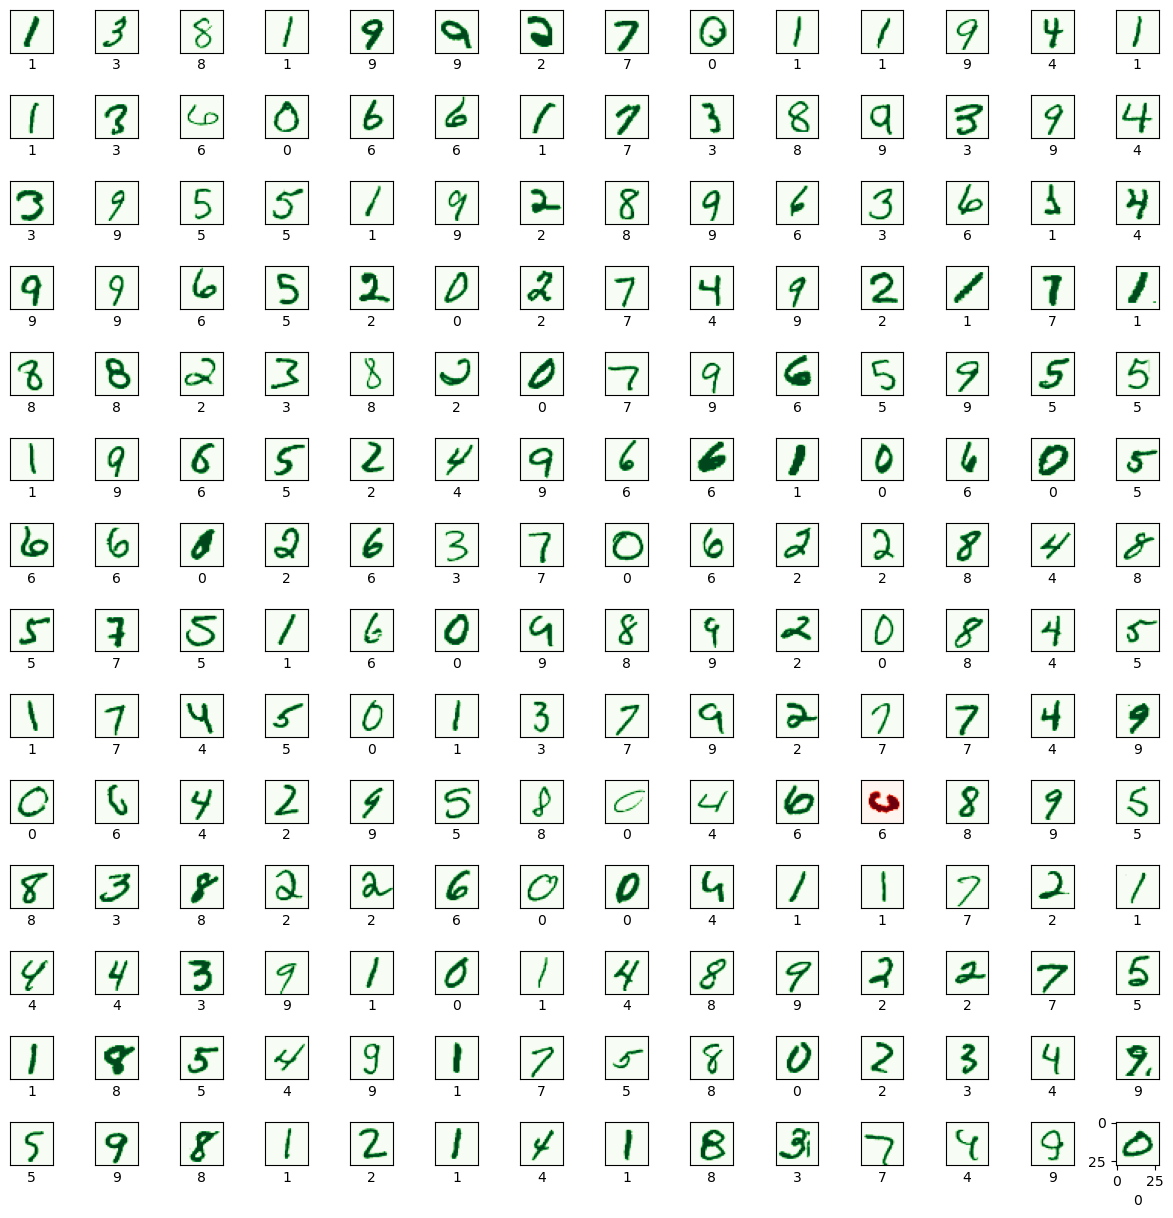

In [46]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

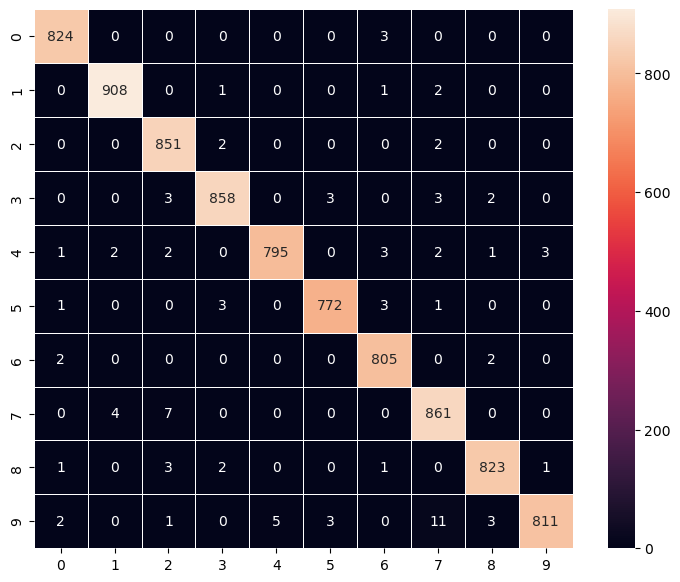

In [47]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [48]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 4s 5ms/step
predictions_one_hot: (28000, 10)


In [49]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.003290e-15,7.891916e-13,1.000000e+00,2.154667e-10,4.153244e-14,1.902259e-18,6.395402e-15,2.641541e-09,3.440417e-10,1.389915e-15
1,9.999998e-01,5.132328e-14,2.429595e-10,3.334314e-12,6.956700e-14,1.200209e-09,1.879230e-07,5.322718e-10,4.984236e-13,4.670330e-10
2,6.153885e-13,4.686619e-11,2.757412e-08,2.717375e-09,9.710698e-05,4.384614e-10,1.778738e-15,1.175531e-06,1.698648e-06,9.999000e-01
3,3.596090e-01,4.925657e-08,4.204663e-03,2.565984e-03,7.291830e-06,6.793700e-06,2.651261e-04,3.324256e-05,1.146932e-04,6.331933e-01
4,8.079839e-12,3.722301e-08,3.319827e-06,9.999692e-01,1.683222e-11,9.291041e-09,1.901485e-11,1.415286e-08,2.740974e-05,4.254838e-08
...,...,...,...,...,...,...,...,...,...,...
27995,3.428380e-14,2.709572e-16,5.460320e-11,1.461518e-08,7.565446e-08,2.626691e-10,2.996145e-17,5.497775e-07,2.993840e-08,9.999994e-01
27996,5.387506e-11,4.780391e-11,6.853755e-09,1.555845e-08,8.831229e-10,4.678954e-10,3.496366e-16,9.999851e-01,3.562885e-12,1.484880e-05
27997,5.399953e-22,2.520597e-15,1.289711e-14,1.000000e+00,8.308364e-17,1.276248e-13,5.872982e-23,7.633581e-14,1.835303e-12,7.311767e-11
27998,3.709163e-10,3.194006e-10,8.888473e-10,1.184588e-07,2.873134e-07,4.654163e-09,4.924033e-13,4.220624e-05,9.291285e-09,9.999573e-01


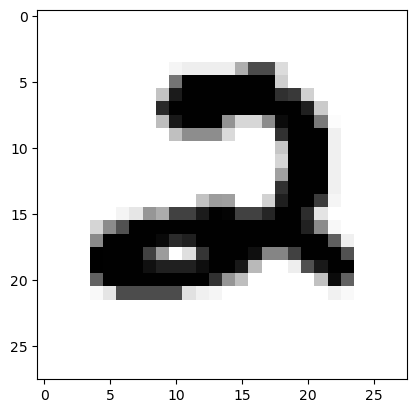

In [50]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [51]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 [==============================] - 4s 5ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
